Final Time: 4.3162556133


Text(0.5, 0, 'Time')

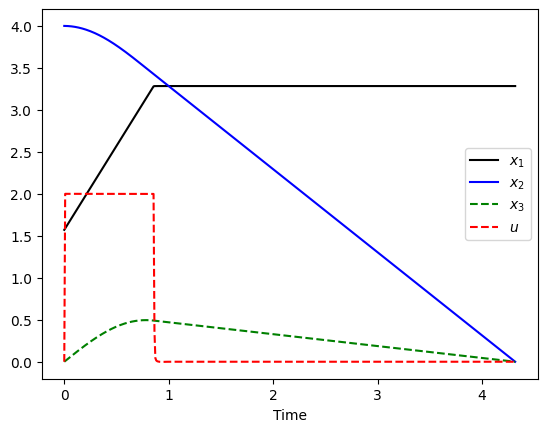

In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO() # initialize GEKKO
nt = 501
m.time = np.linspace(0,1,nt)
# Variables
x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)
p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1
m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)
m.Equation(x2*final<=0)
m.Equation(x3*final<=0)
m.Obj(tf)
m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x1.value,'k-',label=r'$x_1$')
plt.plot(tm,x2.value,'b-',label=r'$x_2$')
plt.plot(tm,x3.value,'g--',label=r'$x_3$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')

In [2]:
from gekko import GEKKO
m = GEKKO(remote=False)
x1,x2,x3,Z = m.Array(m.Var,4)
m.Minimize(Z)
m.Equation(x1+x2+x3==15)
m.Equations([Z>=x1,Z>=x2,Z>=x3])
m.solve()
print('x1: ',x1.value[0])
print('x2: ',x2.value[0])
print('x3: ',x3.value[0])
print('Z:  ',Z.value[0])

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  7
   Intermediates:  0
   Connections  :  0
   Equations    :  5
   Residuals    :  5
 
 Number of state variables:    7
 Number of total equations: -  4
 Number of slack variables: -  3
 ---------------------------------------
 Degrees of freedom       :    0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
     

apm 118.201.101.210_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           6501
 Number of total equations: -         6000
 Number of slack variables: -         1000
 ---------------------------------------
 Degrees of freedom       :           -499
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
Thi

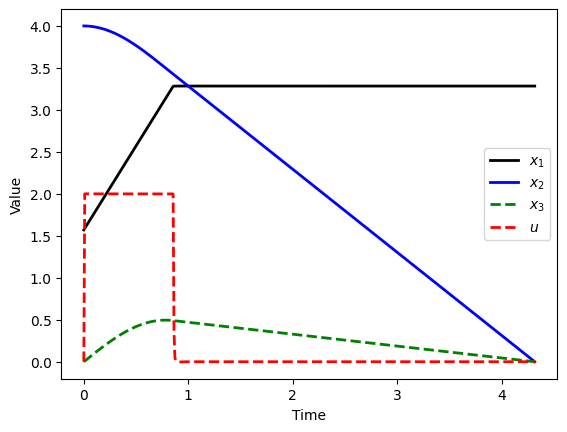

In [3]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()
nt = 501; tm = np.linspace(0,1,nt); m.time = tm

# Variables
x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# FV
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

# MV
u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1

m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)

m.Equation(x2*final<=0)
m.Equation(x3*final<=0)

m.Minimize(tf)

m.options.IMODE = 6
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

plt.figure(1)
plt.plot(tm,x1.value,'k-',lw=2,label=r'$x_1$')
plt.plot(tm,x2.value,'b-',lw=2,label=r'$x_2$')
plt.plot(tm,x3.value,'g--',lw=2,label=r'$x_3$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

apm 118.201.101.210_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           12
   Intermediates:            0
   Connections  :            0
   Equations    :           13
   Residuals    :           13
 
 Number of state variables:           8501
 Number of total equations: -         7500
 Number of slack variables: -         2500
 ---------------------------------------
 Degrees of freedom       :          -1499
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
Thi

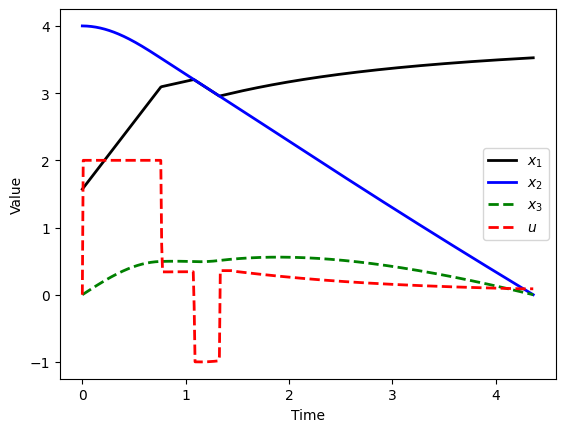

In [4]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 501
tm = np.linspace(0,1,nt)
m.time = tm

x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1
m.Minimize(tf)

Z = m.Var()
m.Minimize(Z)
m.Equations([Z>=x1,Z>=x2,Z>=x3])
m.Maximize(x1)
m.Maximize(x2)
m.Maximize(x3)

u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1

m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)

m.Equation(x2*final<=0)
m.Equation(x3*final<=0)

m.options.IMODE = 6
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

plt.figure(1)
plt.plot(tm,x1.value,'k-',lw=2,label=r'$x_1$')
plt.plot(tm,x2.value,'b-',lw=2,label=r'$x_2$')
plt.plot(tm,x3.value,'g--',lw=2,label=r'$x_3$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()